In [1]:
def vectorfield(w, t, p):
    """
    Definimos las ecuaciones diferenciales para el sistema de doble masa-resorte.
    Arguments:
        w : Vector del estado de las variables 
                  w = [x1,y1,x2,y2]
        t :  Tiempo
        p :  Vector de los parametros:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, L1, L2, b1, b2 = p

    #Creamos f = (x1',y1',x2',y2')
    f = [y1,
         (-b1 * y1 - k1 * (x1 - L1) + k2 * (x2 - x1 - L2)) / m1,
         y2,
         (-b2 * y2 - k2 * (x2 - x1 - L2)) / m2]
    return f

In [3]:
from scipy.integrate import odeint
import numpy as np

# Masas:
m1 = 1.0
m2 = 1.0
# Constante del resorte
k1 = 6.0
k2 = 4.0
# Longitudes naturales
L1 = 0
L2 = 0
# Coeficientes de fricción
b1 = 0.0
b2 = 0.0

# Condiciones iniciales
x1 = -2.0
y1 = 0.0
x2 = 1.0
y2 = 0.0

# Parametros de la ED
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 25.0
numpoints = 250

t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

p = [m1, m2, k1, k2, L1, L2, b1, b2]
w0 = [x1, y1, x2, y2]

wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('dosresortes2_2.dat', 'w') as f:
    for t1, w1 in zip(t, wsol):
        print (t1, w1[0], w1[1], w1[2], w1[3],np.abs((w1[0]-(-2*(np.cos(2*np.sqrt(3.0)*t1))))/(-2*(np.cos(2*np.sqrt(3.0)*t1)))), np.abs((w1[2]-(np.cos(2*np.sqrt(3.0)*t1)))/(np.cos(2*np.sqrt(3.0)*t1))),file=f)

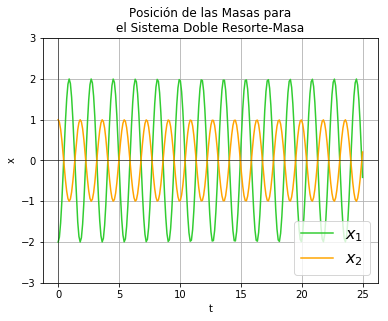

In [12]:
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig, ylabel
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
%matplotlib inline

t, x1, xy, x2, y2, er1, er2 = loadtxt('dosresortes2_2.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
ylabel('x')
grid(True)
lw = 1.5

plot(t, x1, 'limegreen', linewidth=lw)
plot(t, x2, 'orange', linewidth=lw)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
y = [-3,-2, -1,0,1,2,3]
plt.yticks(y)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Posición de las Masas para\nel Sistema Doble Resorte-Masa')
savefig('Ej2_21.png', dpi=100)


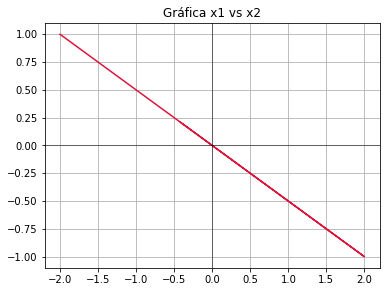

In [13]:
%matplotlib inline

t, x1, xy, x2, y2, er1, er2 = loadtxt('dosresortes2_2.dat', unpack=True)

figure(1, figsize=(6, 4.5))

grid(True)
lw = 1.5

plot(x1,x2, 'crimson', linewidth=lw)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

title('Gráfica x1 vs x2')
savefig('Ej2_22.png', dpi=100)


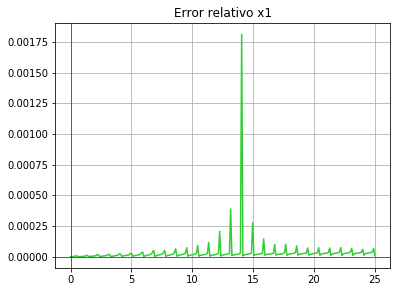

In [14]:
%matplotlib inline

t, x1, xy, x2, y2, er1, er2 = loadtxt('dosresortes2_2.dat', unpack=True)

figure(1, figsize=(6, 4.5))

grid(True)
lw = 1.5

plot(t,er1, 'limegreen', linewidth=lw)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

title('Error relativo x1')
savefig('Ej2_23.png', dpi=100)


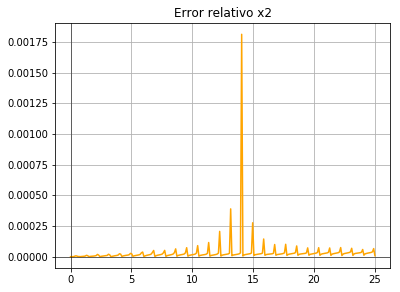

In [15]:
%matplotlib inline

t, x1, xy, x2, y2, er1, er2 = loadtxt('dosresortes2_2.dat', unpack=True)

figure(1, figsize=(6, 4.5))

grid(True)
lw = 1.5

plot(t,er2, 'orange', linewidth=lw)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

title('Error relativo x2')
savefig('Ej2_24.png', dpi=100)